<a href="https://colab.research.google.com/github/Sara19598/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Poonam_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION-**
### **When we hear about the hotel booking we definitely hear about Trivago,OYO,5/7 Star hotels,Tent,etc.. Many people used online hotel booking on the basis of reveiws and a type of hotel. The main few things,human beings will usually consider include prices per night, distance of hotel from attractions and restaurants, availability of free breakfasts, scenery in hotel room, cleaniness of hotel room and of course, availability of free wifi. In this dataset, we are able to know different types of bookings (i.e type of hotel, duration of stay, types of visitors, types of customers, etc).**


# **SCOPE OF THE PROJECT-**
**The objective of the project is obtain the meaningful analysis about the Hotel Bookings with respect to the factors asscociated with it. Mainly focused on terms as below-**

1. Data Prepping.
2. Visualizing the best time for Hotel booking,Price for Hotel bookings and special requests fulfillment by Hotels.
3. Overview of Country for Hotel bookings .
4. Correlaton between variables.
 







# **PROBLEM STATEMENT-**
### <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **DATA PREPPING**

In [98]:
#Accessing the google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the libraries-**


In [99]:
#Importing libraries for Exploratory data Analysis
import numpy as np                               # For some math operations on arrays in predictions.
import pandas as pd                              # To upload the large data set and wrangling the data.
import matplotlib.pyplot as plt                  # Used for visualization of dataset.
import seaborn as sns                            # Used for visualization of dataset.
import plotly.express as px                      # Graphing library which makes interactive, publication-quality graphs.
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator   # Used to represent the frequency of most word arriving in the data set for particular column as required.
import plotly.graph_objects as go                # Used to provide precise data validation.
import warnings                                  # For filtering and ignoring the warnings.
warnings.filterwarnings('ignore')
import missingno as mno                          # install pip install missingo



In [100]:
# Loading Data set of csv file
HBA=pd.read_csv('/content/drive/MyDrive/Capstone Project 1 EDA/Hotel Bookings.csv')


**First five values of dataset of Hotel Booking analysis**

In [101]:
HBA.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Last five values of dataset of Hotel Booking Analysis**

In [102]:
HBA.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


# **Some Basic Information about Data set-**

In [103]:
HBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [104]:
HBA.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [105]:
len(HBA.columns)

32

In [106]:
list(HBA.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [107]:
HBA.shape

(119390, 32)

In [108]:
type(HBA)

pandas.core.frame.DataFrame

# **Checking the Null values for cleaning the Dataset for further analysis.**

In [109]:
HBA.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

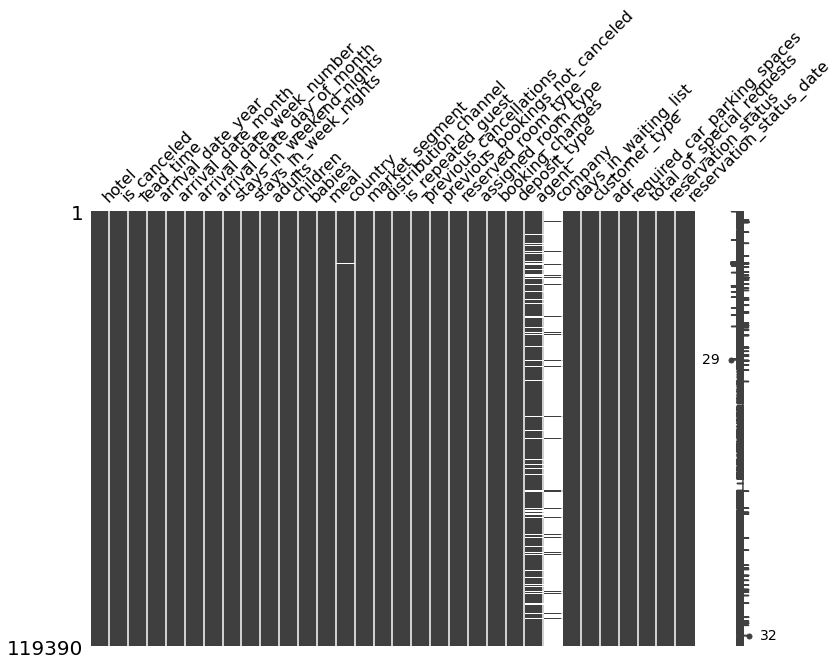

In [110]:
# To visualize the Null values disturbance in dataset-
mno.matrix(HBA,figsize=(12,8))

**Now, to remove the Null values- we replace the null values by 0**

In [111]:
HBA['children'].fillna('unknown',inplace=True)
HBA['country'].fillna('unknown',inplace=True)
HBA['agent'].fillna('unknown',inplace=True)
HBA['company'].fillna('unknown',inplace=True)

In [112]:
# Again checking the Null values after replacing it in Dataset-
HBA.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

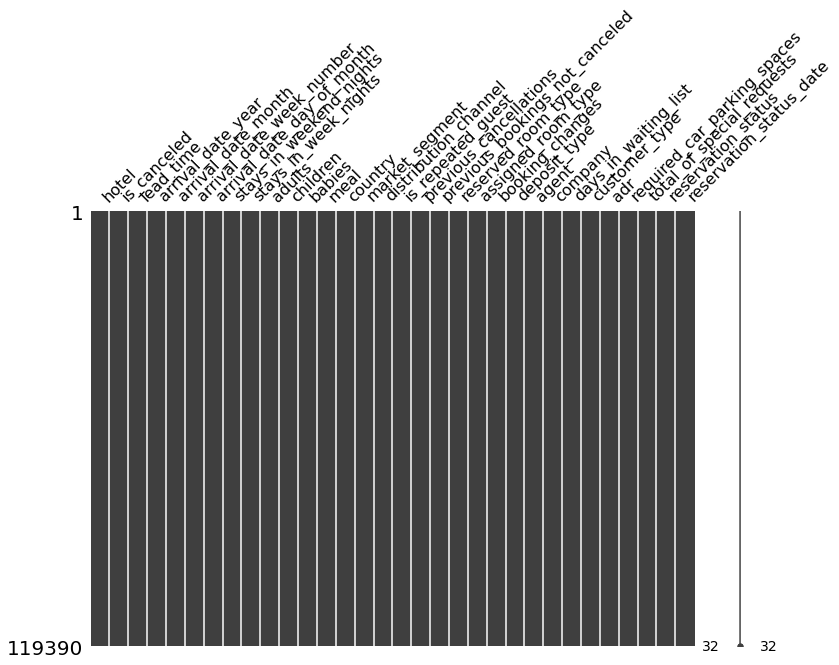

In [113]:
mno.matrix(HBA,figsize=(12,8))

**REMARK - Finally, we created the dataset without NAN values .**

In [114]:
HBA.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             6
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              334
company                            353
days_in_waiting_list     

## **Let's check the count for some variables of column-**

In [115]:
hotel_type=HBA['hotel'].value_counts()
hotel_type

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [116]:
HBA.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
BDI        1
AIA        1
PLW        1
SLE        1
BWA        1
Name: country, Length: 178, dtype: int64

In [117]:
HBA.children.value_counts()

0.0        110796
1.0          4861
2.0          3652
3.0            76
unknown         4
10.0            1
Name: children, dtype: int64

In [118]:
HBA.agent.value_counts()

9.0        31961
unknown    16340
240.0      13922
1.0         7191
14.0        3640
           ...  
358.0          1
54.0           1
367.0          1
388.0          1
158.0          1
Name: agent, Length: 334, dtype: int64

# **EXPLORATRY DATA ANALYSIS - DATA VISUALIZATION**

## **Let's check the percentage of Hotel booking in which type of hotel is huge.**

([<matplotlib.patches.Wedge at 0x7f5e7a3e6210>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(1.0433630545977801, 0.592784561455838, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.6086284485153717, 0.3457909941825721, '33.6%')])

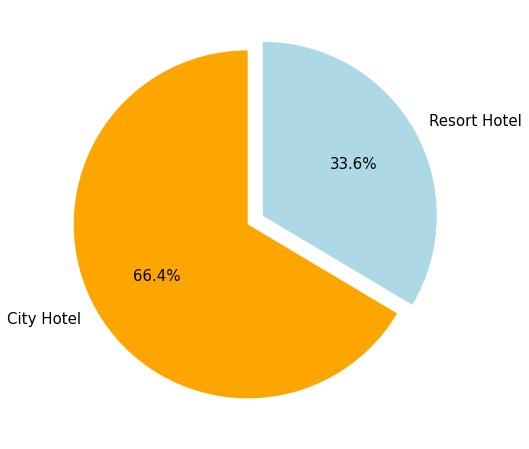

In [119]:
# Pie chart to visualize the Hotel booking percentage.
plt.rcParams['figure.figsize']=8,8
labels=hotel_type.index.tolist()
sizes=hotel_type.tolist()
explode=(0,0.1)
colors=['orange','lightblue']
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90,textprops={'fontsize':15})

### ***Comment:- Ohh,its seems that a huge proportion of hotels was City Hotel.Resort hotel tends to be expensive side and most likely people visit that type of hotel in weekends, so people will stick with city hotel more in number.***

# **Overview of Hotel Bookings in periods.**

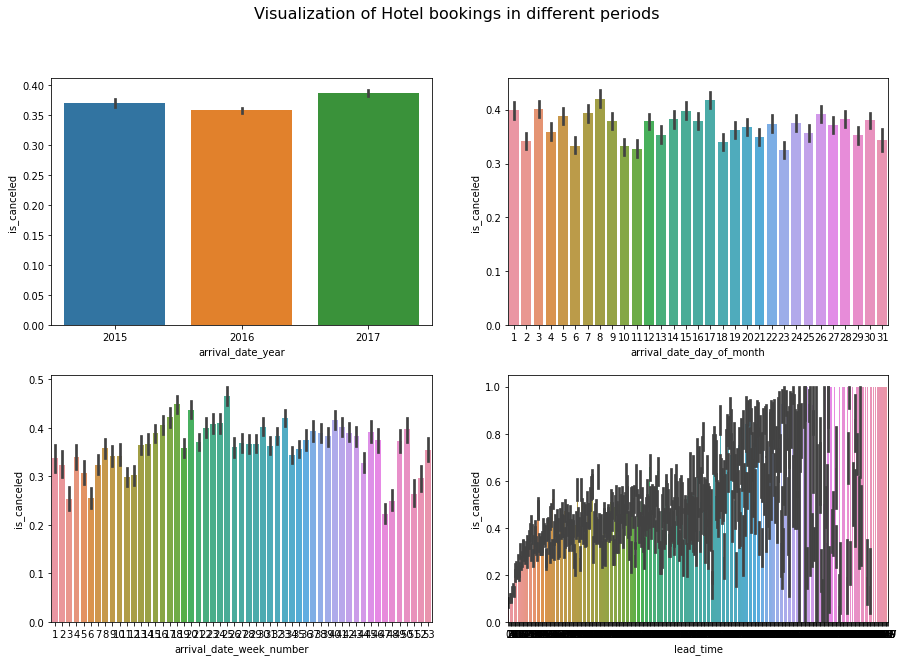

In [120]:
# Barplot to visualize the hotel bookings in different periods.
fig,axes = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Visualization of Hotel bookings in different periods', fontsize=16)
sns.barplot(HBA['arrival_date_year'],HBA['is_canceled'],ax=axes[0,0])
sns.barplot(HBA['arrival_date_day_of_month'],HBA['is_canceled'],ax=axes[0,1])
sns.barplot(HBA['arrival_date_week_number'],HBA['is_canceled'],ax=axes[1,0])
sns.barplot(HBA['lead_time'],HBA['is_canceled'],ax=axes[1,1])
plt.show()


### ***Comment:- It seems that, hotel bookings are more in the year 2017 as compare to cancellations.Secondly,we observe that there is ups and downs in hotel booking for months and weeks.Moreover, there is positive indication for lead time for arrival of hotel bookings with respect to cancellations.***

# **Column Features Variation-**

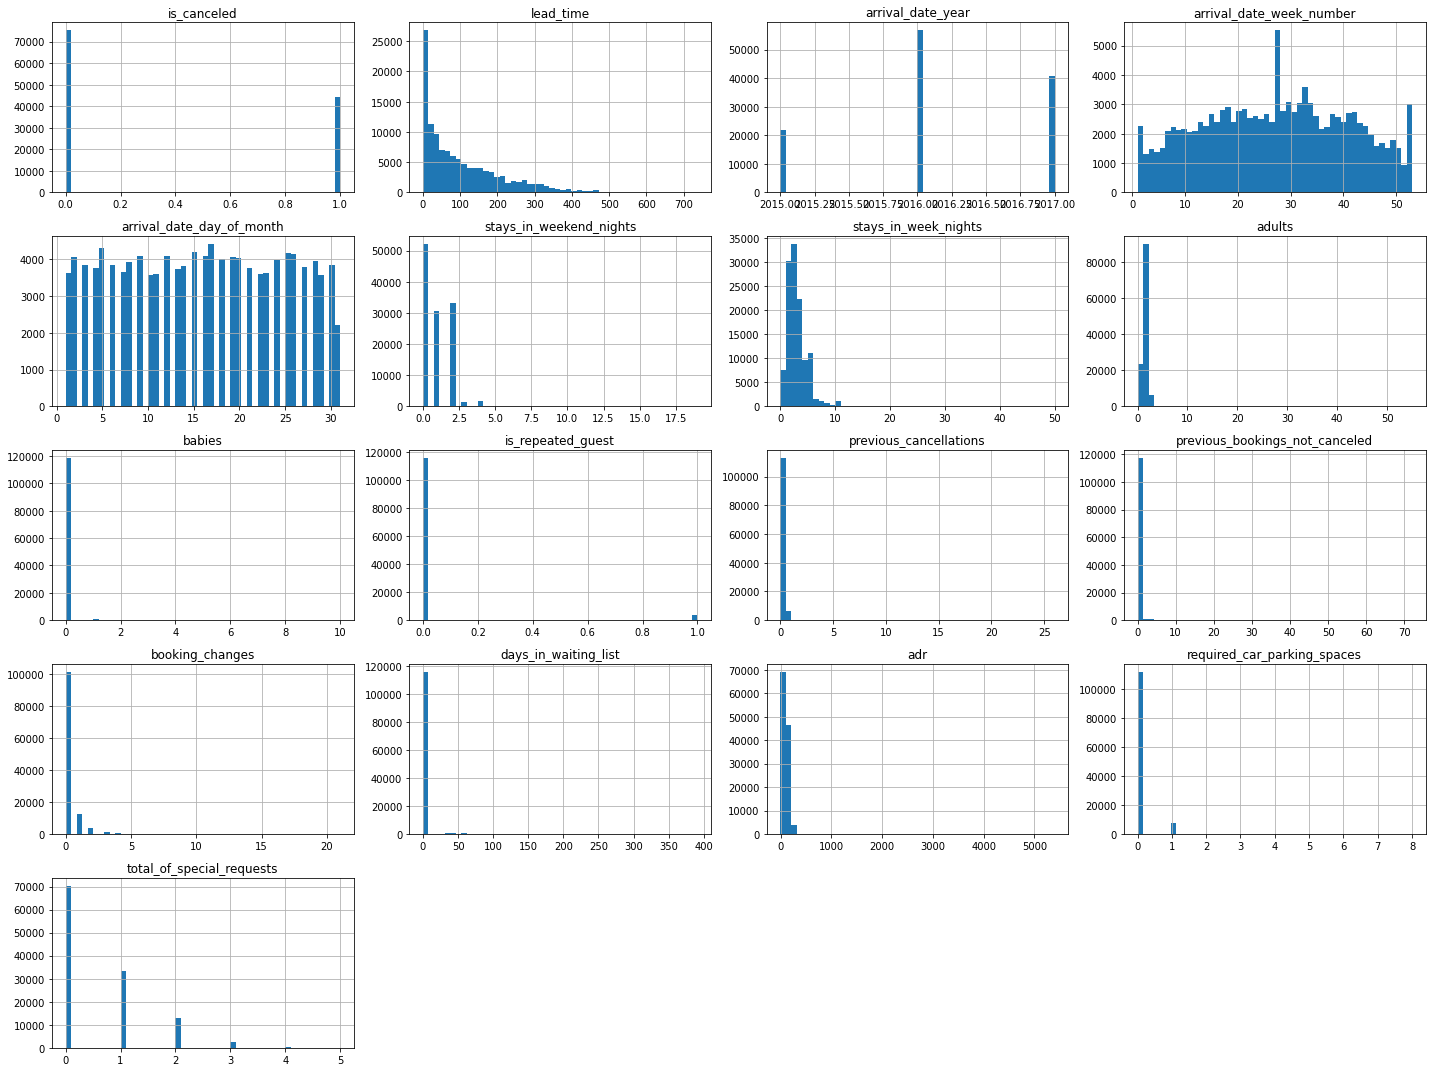

In [121]:
#We can plot histogram of the column features.
# a histogram plot for each numerical attribute
HBA.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

### ***Comment:- It is observe that there are different varitions in column features respective to their nature type.***

## **Visualize the Repeated Guests Pattern-**

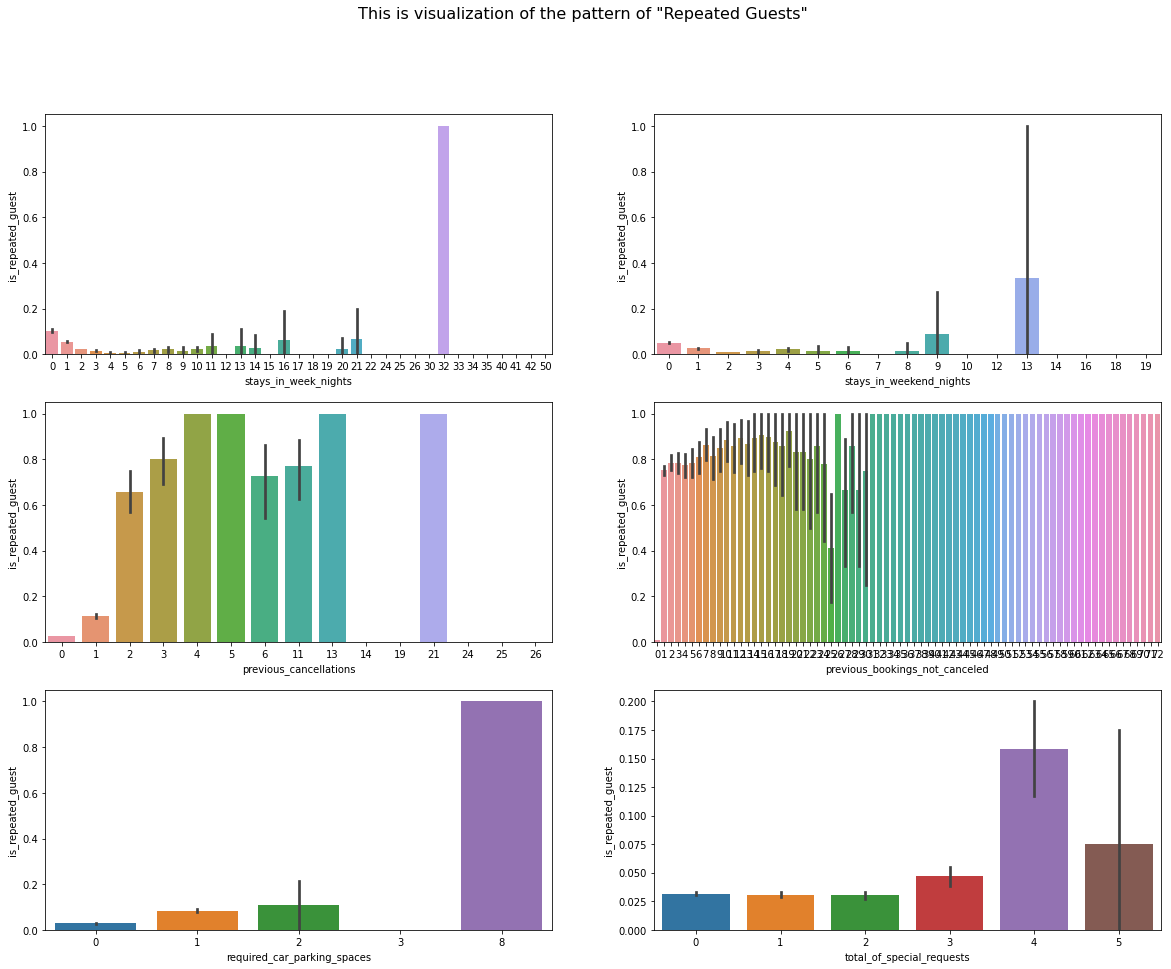

In [122]:
fig,axes = plt.subplots(3,2,figsize=(20,15))
fig.suptitle('This is visualization of the pattern of "Repeated Guests" ', fontsize=16)
sns.barplot(HBA['stays_in_week_nights'],HBA['is_repeated_guest'],ax=axes[0,0])
sns.barplot(HBA['stays_in_weekend_nights'],HBA['is_repeated_guest'],ax=axes[0,1])
sns.barplot(HBA['previous_cancellations'],HBA['is_repeated_guest'],ax=axes[1,0])
sns.barplot(HBA['previous_bookings_not_canceled'],HBA['is_repeated_guest'],ax=axes[1,1])
sns.barplot(HBA['required_car_parking_spaces'],HBA['is_repeated_guest'],ax=axes[2,0])
sns.barplot(HBA['total_of_special_requests'],HBA['is_repeated_guest'],ax=axes[2,1])
plt.show()

### ***Comment:- Here we can visualize the pattern of repeated guests for stay in nights, required car parking spaces , guest special requets , previous cancellations and previous not cancelled bookings.***

## **Let's Check the best time of hotel bookings -**

In [123]:
arrival_month=HBA['arrival_date_month'].value_counts()
arrival_month

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

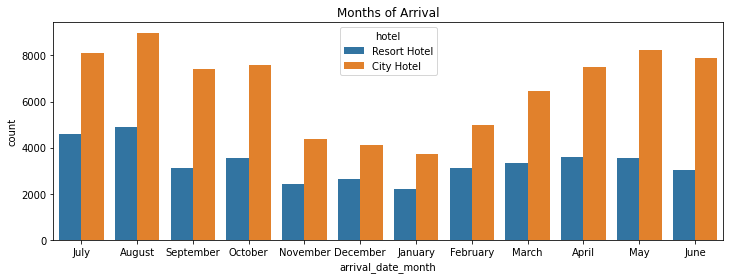

In [124]:
plt.figure(figsize=(12,4))
sns.countplot(x='arrival_date_month', hue = 'hotel', data=HBA)
plt.title('Months of Arrival')
plt.show()

### ***Comment:- It seems that City hotel has highest bookings in the month of August whereas Resort hotel has lowest bookings in the month of January.***

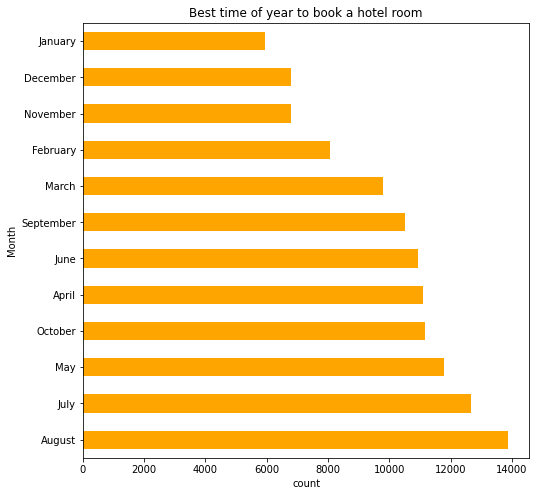

In [125]:
arrival_month.plot(kind='barh',color="orange")
plt.xlabel("count")
plt.ylabel("Month")
plt.title("Best time of year to book a hotel room")
plt.rcParams['figure.figsize']=(15,10)

### ***Comment:- In the above graph,we observe that from the month of January hotel bookings are increased in some pattern till month of August which is best time of Hotel Bookings.***

## **Let's Observe the best rate of Hotel-**


In [126]:
#what are the average prices for each person per night by hotel?
def average_daily_rate_person():
    for h in HBA.hotel.unique():
        print(f'Average daily rate per person: {HBA[HBA.hotel == h].adr.mean():.2f} in {h}.')
    return

average_daily_rate_person()

Average daily rate per person: 94.95 in Resort Hotel.
Average daily rate per person: 105.30 in City Hotel.


In [127]:
#what is the average stay in days?
def average_stay_days():
    stay = HBA.loc[HBA.is_canceled == 0, ['hotel', 'stays_in_week_nights', 'stays_in_weekend_nights']] 
    stay['nights'] = stay.stays_in_week_nights + stay.stays_in_weekend_nights    
    stay = stay.groupby('hotel').agg({'nights': 'mean'})
    
    return stay

average_stay_days()


,nights
hotel,
City Hotel,2.923618
Resort Hotel,4.142892


## **Visualizing the Special Requests receive from guests to Hotels-**

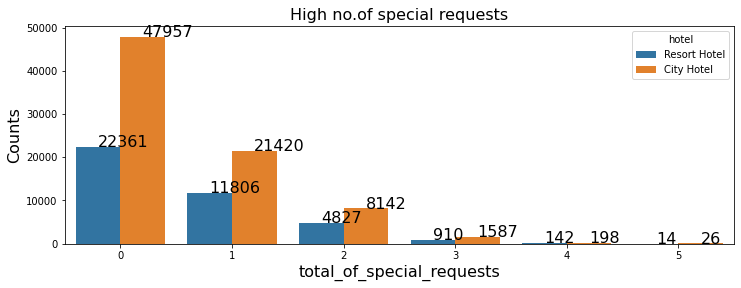

In [128]:
special_req=HBA['total_of_special_requests'].value_counts()
plt.figure(figsize=(12,4))
ch=sns.countplot(x='total_of_special_requests', hue = 'hotel', data=HBA)
plt.title('Months of Arrival')
plt.xlabel('total_of_special_requests', size=16)
plt.ylabel('Counts', size=16)
plt.title('High no.of special requests', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), size=16)
plt.show()

### ***Comment:- It seems that City hotel has the huge special requets whereas Resort hotel has the lowest special requets from the guests.***

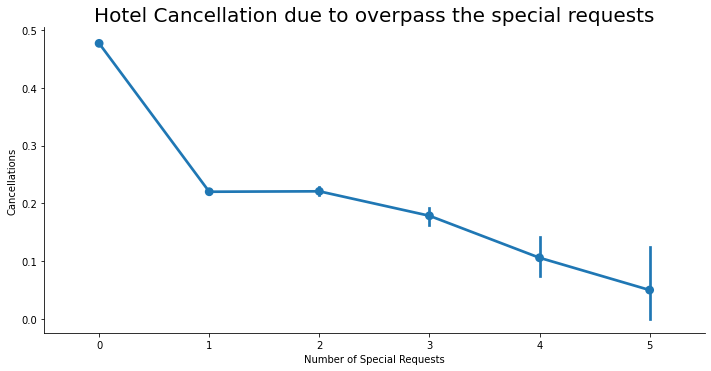

In [129]:
 #Point Plot
sns.catplot(y='is_canceled',x='total_of_special_requests',kind='point',data=HBA,height=5,aspect=2)
plt.xlabel('Number of Special Requests',size=10)
plt.ylabel('Cancellations',size=10)
plt.title('Hotel Cancellation due to overpass the special requests',size=20)
plt.show()

### ***Comment:- As special requests from guests increases cancellation rate decreases.***

### ***Remark:- High negative total of special requests with cancelation. My hypothesis is that when a customer has more special reqeusts and they are met, the customer is more likely to stay with the hotel***

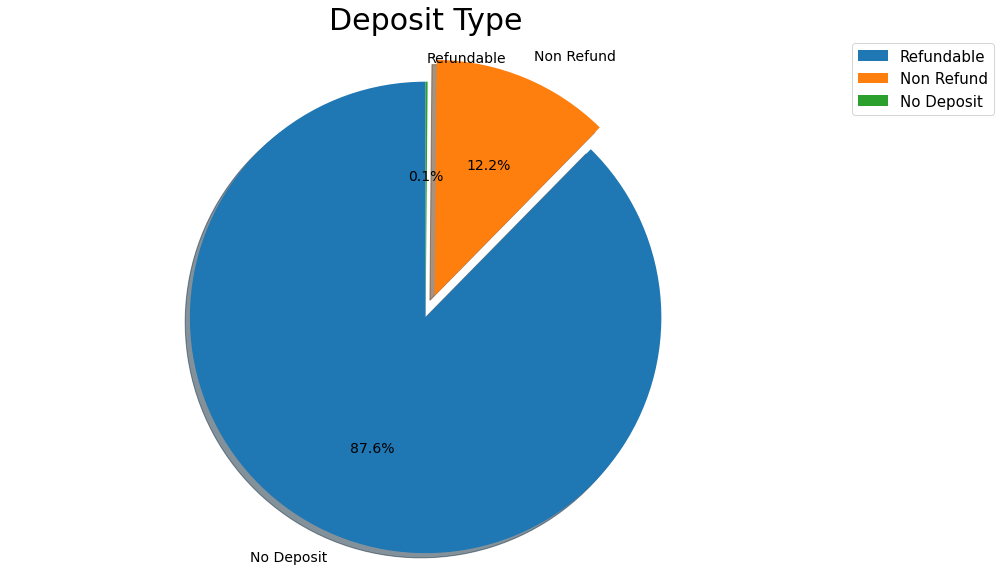

In [130]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = HBA['deposit_type'].value_counts().index.tolist()
sizes = HBA['deposit_type'].value_counts().tolist()
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')


fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',textprops={'fontsize': 14},
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Deposit Type',fontsize=30)
plt.legend(['Refundable','Non Refund','No Deposit'],loc='upper left',bbox_to_anchor=(1,1),fontsize=15)
plt.show()

### ***Comment:- Here, we observe that 'No deposit' has the highest percentage rate with respect to refundable and non-refundable deosite type.***

# **Overview of Countries for Hotel Bookings-**

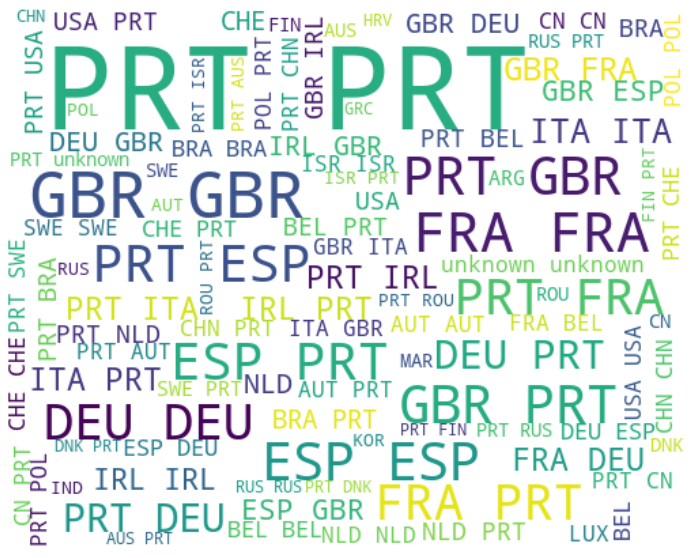

In [131]:
from wordcloud import WordCloud
from scipy import signal
WordCloud(collocations=False)
state= HBA.country.dropna(0)
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(max_words=100,background_color = 'white',
                     width = 500,
                     height = 400).generate(' '.join(state))
plt.axis('off')
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

### ***Comment:- It seems the Country 'PRT' has more frequency of hotel bookings as per other countries like GBR,FRA,ESP,etc.***

**Now, we will see count for the first 15 countries -**

---



In [132]:
HBA.country.value_counts()[:15]

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
Name: country, dtype: int64

In [133]:
# Groupby by country
country = HBA.groupby("country")

# Summary statistic of all countries
country.describe().head()

is_canceled                                ... total_of_special_requests                      
              count      mean       std  min  25%  ...                       min   25%  50%   75%  max
country                                            ...                                                
ABW             2.0  0.000000  0.000000  0.0  0.0  ...                       1.0  1.25  1.5  1.75  2.0
AGO           362.0  0.566298  0.496271  0.0  0.0  ...                       0.0  0.00  0.0  1.00  4.0
AIA             1.0  0.000000       NaN  0.0  0.0  ...                       0.0  0.00  0.0  0.00  0.0
ALB            12.0  0.166667  0.389249  0.0  0.0  ...                       0.0  0.00  0.0  1.25  3.0
AND             7.0  0.714286  0.487950  0.0  0.5  ...                       0.0  0.00  0.0  1.00  1.0

[5 rows x 136 columns]

In [134]:
# selects the top 5 highest average points among all 44 countries:

country.mean().sort_values(by="lead_time",ascending=False).head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
country,,,,,,,,,,,,,,,,,
FJI,1.0,322.0,2017.000000,22.0,31.0,0.000000,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,135.33,0.0,0.000000
FRO,0.8,286.4,2017.000000,31.6,29.8,3.600000,8.4,3.0,0.0,0.0,0.0,0.0,0.2,0.0,155.20,0.0,0.800000
BEN,1.0,274.0,2016.666667,23.0,15.0,0.333333,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,123.20,0.0,1.333333
LCA,0.0,268.0,2016.000000,42.0,9.0,2.000000,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,80.75,0.0,0.000000
KNA,0.0,251.5,2016.000000,37.5,13.5,0.500000,1.5,1.5,0.0,0.0,0.0,0.0,0.5,0.0,92.20,0.0,0.000000


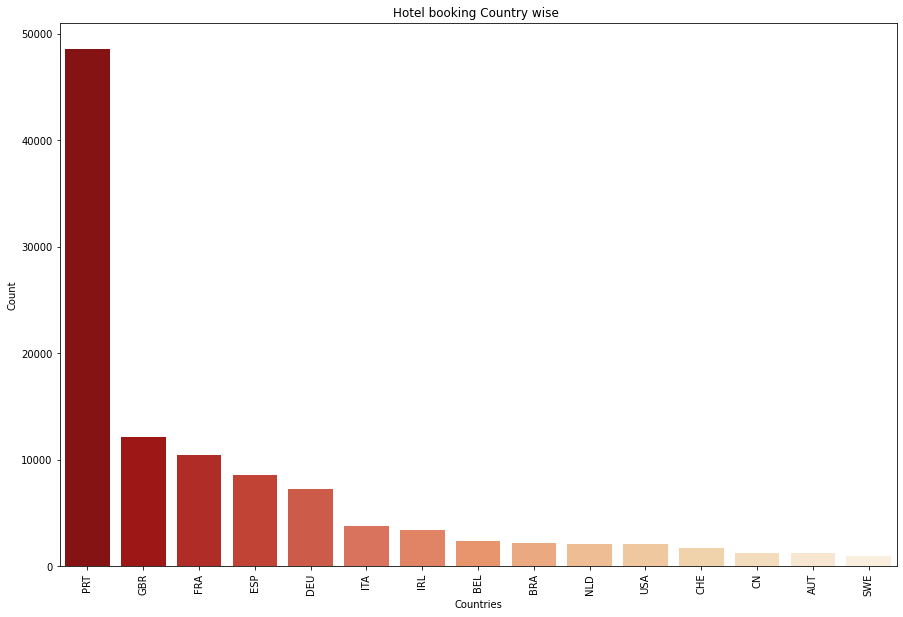

In [135]:
plt.subplots(figsize=(15,10))
sns.barplot(HBA['country'].value_counts()[:15].index,HBA['country'].value_counts()[:15].values,palette='OrRd_r')
plt.title('Hotel booking Country wise ')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

### ***Comment:- We can visualize that, 'PRT' has the huge hotel bookings and 'SWE' has the low hotel bookings.***

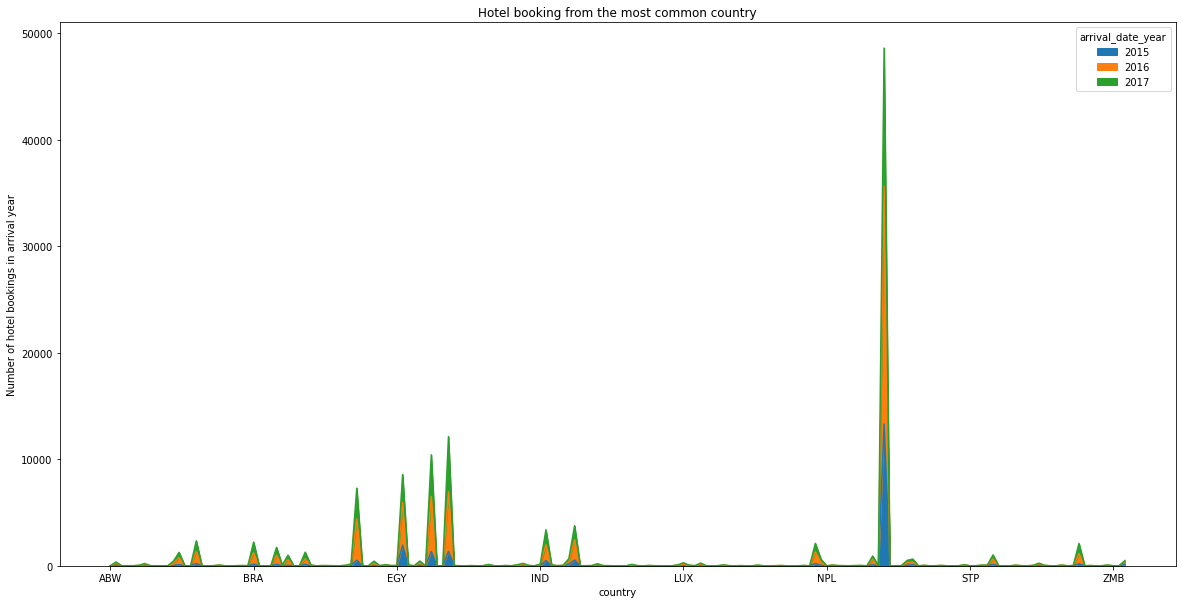

In [136]:
pd.crosstab(HBA.country,HBA.arrival_date_year).plot(kind='area',figsize=(20,10))
plt.title('Hotel booking from the most common country')
plt.ylabel('Number of hotel bookings in arrival year')
plt.show()

### ***Comment:- Above Area Graph shows the fluctuations of countries with respect to Hotel Bookings and the highest peak is observe in between the 'NPL' and 'STP' countries.***


# ***Visualization by the Folium Map-***

In [137]:
country_wise_guests = HBA[HBA['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
161,DJI,1
162,AIA,1
163,NPL,1
164,GUY,1


In [138]:
import folium
from folium.plugins import HeatMap
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()


### ***Comment:- People from all over the world are staying in City and Resort hotel. Most guests are from Portugal and other countries in Europe.***

## **Overview for Market Segments and Distribution Channel For Hotel Booking Publicity-**

Text(0.5, 1.0, 'Types of market segment')

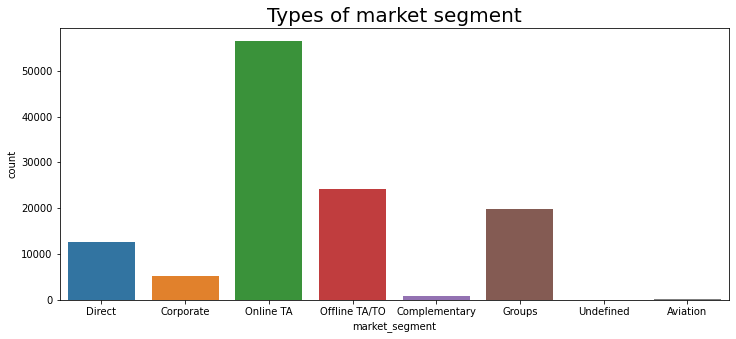

In [139]:
#Looking into market segments and distribution channel
plt.figure(figsize=(12,5))
sns.countplot(data = HBA, x = 'market_segment').set_title('Types of market segment', fontsize = 20)

Text(0.5, 1.0, 'Types of distribution channel')

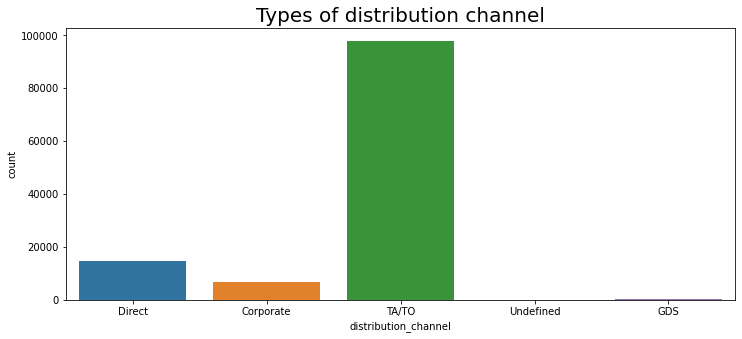

In [140]:
plt.figure(figsize=(12,5))
sns.countplot(data = HBA, x = 'distribution_channel').set_title('Types of distribution channel', fontsize = 20)

### ***Comment:- Majority of the distribution channels and market segments involve travel agencies (online or offline).We can target our marketing area to be on these travel agencies website and work with them since majority of the visitors tend to reach out to them.***

# **Let's Check the correlated variables in dataset-**

In [141]:
corr=HBA.corr()
corr
correlation = HBA.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

### ***Comment:- The variable 'is_cancelled' is highly correlated with 5 variables name as - lead_time,total_of_special_requests,required_car_parking_spaces, booking_changes, previous_cancellations.***

## **Heat Map to visualize the correlated variables-**

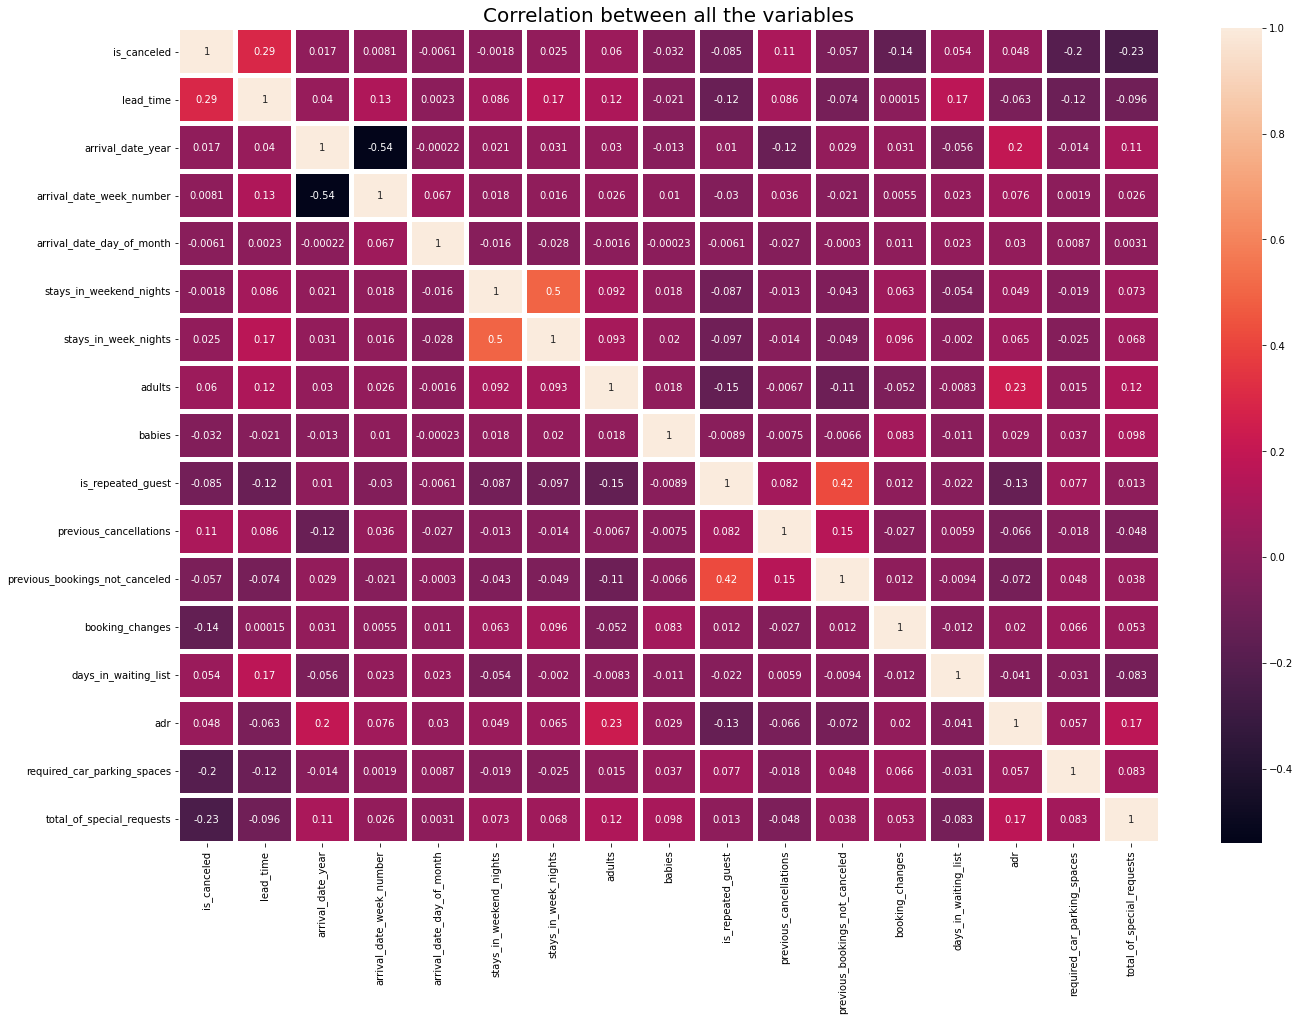

In [142]:
plt.figure(figsize=(22,15))
sns.heatmap(HBA.corr(), annot=True,linewidths=4)
plt.title('Correlation between all the variables',size=20,)
plt.show() 

### ***Comment:-The first 5 variables (lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes, previous_cancellations) can be used for building a model in future, since they are the ones with correlation > 0.10 for is_canceled.***

## **Demonstration of the relationship between the variables-**

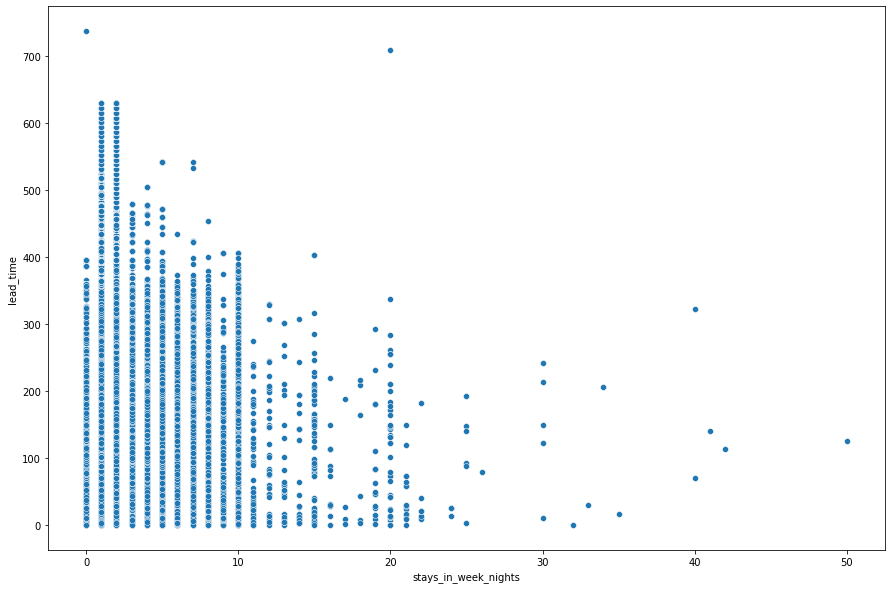

In [143]:
#Plotting the scatter plot to visualize the pattern of relationship between the variables-

sns.scatterplot(data=HBA, y="lead_time", x="stays_in_week_nights")

### ***Comment:- We can conclude that,Lead time will be maximum when there wil be minimum stay at week nights by the guests at hotel.And,we observe that there is negative correlation between the independent and dependent variable.***